## About dataset

### Long-term rent (per-month payments) appartments in Lviv

Dataset was generated from web-site https://dom.ria.com/uk
for Lviv, UA (real estate rent, timeframe - 1 month)


## Content

* Data mining
* Data cleaning
* Aggregations and Visualization
* Uncovering insights
* Take away

### Data mining

In [392]:
!pip install folium

In [393]:
print(folium.__version__)

0.11.0


In [394]:
import json
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

let's read dataset from the file. <br>
to generate dataset please use this PostMan collection <br>
https://www.getpostman.com/collections/8b0e3866ebb35327537c

In [553]:
with open("dataset_new.json","r", errors='ignore') as json_file:
    data = json.load(json_file)

let's check if data exists in json file 

In [554]:
len(data["items"])

1000

Ok, now we are going to defune csv structure and load data from json

In [555]:
f = open("dump.csv", "w")

f.write(
    "rangeFactorNew" + "," +
    "total_square_meters" + "," +
    "rooms_count" + "," +
    "floors_count" + "," +
    "floor" + "," +
    "price" + "," +
    "price_item" + "," +
    "district_id" + "," +
    "is_commercial" + "," +
    "agency_id" + "," +
    "deleted_by" + "," +
    "delete_reason" + "," +
    "longitude" + "," +
    "latitude" + "," +
    "price_usd" + "," +
    "price_eur" + "," +
    "price_uah" + "\n"
)

for item in data["items"]:

    f.write(
        str(item.get("rangeFactorNew", "")) + "," +
        str(item.get("total_square_meters", "")) + "," +
        str(item.get("rooms_count", "")) + "," +
        str(item.get("floors_count", "")) + "," +
        str(item.get("floor", "")) + "," +
        str(item.get("price", "")) + "," +
        str(item.get("price_item", "")) + "," +
        str(item.get("district_id", "")) + "," +
        str(item.get("is_commercial", "")) + "," +
        str(item.get("agency_id", "")) + "," +
        str(item.get("deleted_by", "")) + "," +
        str(item.get("delete_reason", "")) + "," +
        str(item.get("longitude", "")) + "," +
        str(item.get("latitude", "")) + "," +
        str(item.get("priceArr", "").get("1", "")) + "," +
        str(item.get("priceArr", "").get("2", "")) + "," +
        str(item.get("priceArr", "").get("3", "")) + "\n"
    )
    
f.close()

print("done..")

done..


### Data cleaning

In [556]:
df = pd.read_csv("dump.csv")
df.head()

,rangeFactorNew,total_square_meters,rooms_count,floors_count,floor,price,price_item,district_id,is_commercial,agency_id,deleted_by,delete_reason,longitude,latitude,price_usd,price_eur,price_uah
0,11594031457,34.0,1,2,2,3900,115.0,15090,0,NaN,NaN,NaN,24.026230,49.816677,143,127,3 900
1,11593653704,50.0,1,10,6,450,9.0,15090,1,23844.0,NaN,NaN,24.050093,49.818576,450,400,12 262
2,11593653701,65.0,2,10,6,550,8.0,15090,1,23844.0,NaN,NaN,24.050093,49.818576,550,489,14 986
3,11593481867,50.0,1,3,2,400,8.0,15089,1,23844.0,NaN,NaN,24.056087,49.838916,400,355,10 899
4,2101594293941,60.0,2,4,3,8000,133.0,15088,0,NaN,cron,1.0,24.004730,49.838692,294,261,8 000


In [557]:
# df.query('rooms_count == 2').sort_values(by='total_square_meters', ascending=False).head(10)
# df.query('total_square_meters == 3142.0')
df = df.drop(df[df.total_square_meters == 3142.0].index)
df['rangeFactorNew'].count()

999

Some data cleaning and polishing

In [582]:
df["price_usd"] = df["price_usd"].astype(str).str.replace(" ","")
df["price_eur"] = df["price_eur"].astype(str).str.replace(" ","")
df["price_uah"] = df["price_uah"].astype(str).str.replace(" ","")

df["price_usd"] = pd.to_numeric(df["price_usd"], errors='ignore')
df["price_eur"] = pd.to_numeric(df["price_eur"], errors='ignore')
df["price_uah"] = pd.to_numeric(df["price_uah"], errors='ignore')

df["price_usd"] = df["price_usd"].astype(float)
df["price_eur"] = df["price_eur"].astype(float)
df["price_uah"] = df["price_uah"].astype(float)

df.head()

,rangeFactorNew,total_square_meters,rooms_count,floors_count,floor,district_id,is_commercial,agency_id,longitude,latitude,price_usd,price_eur,price_uah,deleted
0,11594031457,34.0,1,2,2,15090,0,NaN,24.026230,49.816677,143.0,127.0,3900.0,False
1,11593653704,50.0,1,10,6,15090,1,23844.0,24.050093,49.818576,450.0,400.0,12262.0,False
2,11593653701,65.0,2,10,6,15090,1,23844.0,24.050093,49.818576,550.0,489.0,14986.0,False
3,11593481867,50.0,1,3,2,15089,1,23844.0,24.056087,49.838916,400.0,355.0,10899.0,False
4,2101594293941,60.0,2,4,3,15088,0,NaN,24.004730,49.838692,294.0,261.0,8000.0,True


do some more diligence

In [559]:
df['deleted_by'].unique()

array([nan, 'cron', 'admin', 'user'], dtype=object)

In [560]:
df['deleted'] = [True if s in ['nan', 'cron', 'admin', 'user'] else False for s in df['deleted_by']]
df.head()

,rangeFactorNew,total_square_meters,rooms_count,floors_count,floor,price,price_item,district_id,is_commercial,agency_id,deleted_by,delete_reason,longitude,latitude,price_usd,price_eur,price_uah,deleted
0,11594031457,34.0,1,2,2,3900,115.0,15090,0,NaN,NaN,NaN,24.026230,49.816677,143,127,3900,False
1,11593653704,50.0,1,10,6,450,9.0,15090,1,23844.0,NaN,NaN,24.050093,49.818576,450,400,12262,False
2,11593653701,65.0,2,10,6,550,8.0,15090,1,23844.0,NaN,NaN,24.050093,49.818576,550,489,14986,False
3,11593481867,50.0,1,3,2,400,8.0,15089,1,23844.0,NaN,NaN,24.056087,49.838916,400,355,10899,False
4,2101594293941,60.0,2,4,3,8000,133.0,15088,0,NaN,cron,1.0,24.004730,49.838692,294,261,8000,True


In [561]:
df.drop(['price','price_item','deleted_by','delete_reason'], axis=1, inplace=True)
df.head()

,rangeFactorNew,total_square_meters,rooms_count,floors_count,floor,district_id,is_commercial,agency_id,longitude,latitude,price_usd,price_eur,price_uah,deleted
0,11594031457,34.0,1,2,2,15090,0,NaN,24.026230,49.816677,143,127,3900,False
1,11593653704,50.0,1,10,6,15090,1,23844.0,24.050093,49.818576,450,400,12262,False
2,11593653701,65.0,2,10,6,15090,1,23844.0,24.050093,49.818576,550,489,14986,False
3,11593481867,50.0,1,3,2,15089,1,23844.0,24.056087,49.838916,400,355,10899,False
4,2101594293941,60.0,2,4,3,15088,0,NaN,24.004730,49.838692,294,261,8000,True


In [562]:
df.columns

Index(['rangeFactorNew', 'total_square_meters', 'rooms_count', 'floors_count',
       'floor', 'district_id', 'is_commercial', 'agency_id', 'longitude',
       'latitude', 'price_usd', 'price_eur', 'price_uah', 'deleted'],
      dtype='object')

In [583]:
df.dtypes

rangeFactorNew           int64
total_square_meters    float64
rooms_count              int64
floors_count             int64
floor                    int64
district_id              int64
is_commercial            int64
agency_id              float64
longitude              float64
latitude               float64
price_usd              float64
price_eur              float64
price_uah              float64
deleted                   bool
dtype: object

### Dataset legend
<table>
    <tr><td><b>rangeFactorNew</b></td><td>unique id, natural key</td></tr>
    <tr><td><b>total_square_meters</b></td><td>entire area in srt meters</td></tr>
    <tr><td><b>rooms_count</b></td><td>number of rooms, including kitchen and living room (not a bed rooms only)</td></tr>
    <tr><td><b>floors_count</b></td><td>number of floors</td></tr>
    <tr><td><b>floor</b></td><td>current floor, starting from 1st as a ground floor</td></tr>
    <tr><td><b>district_id</b></td><td>unique district id (will be mapped later on)</td></tr>
    <tr><td><b>is_commercial</b></td><td>does this for commertial use?</td></tr>
    <tr><td><b>agency_id</b></td><td>uniqie agency id (will be mapped later on)</td></tr>
    <tr><td><b>longitude</b></td><td>geo longitude</td></tr>
    <tr><td><b>latitude</b></td><td>get latitude</td></tr>
    <tr><td><b>price_usd</b></td><td>price in usd, per month</td></tr>
    <tr><td><b>price_eur</b></td><td>price in eur, per month</td></tr>
    <tr><td><b>price_uah</b></td><td>price in uah, per month</td></tr>
    <tr><td><b>deleted</b></td><td>active or not?</td></tr>
</table>

Ok, our dataset is ready

### Aggregations and Visualization

#### Appartment Size (# of Rooms) distribution
<hr>

In [573]:
grouped_rooms_count = df[['rooms_count', 'rangeFactorNew']].groupby("rooms_count").count()
grouped_rooms_count

,rangeFactorNew
rooms_count,
1,400
2,447
3,129
4,19
5,3
6,1


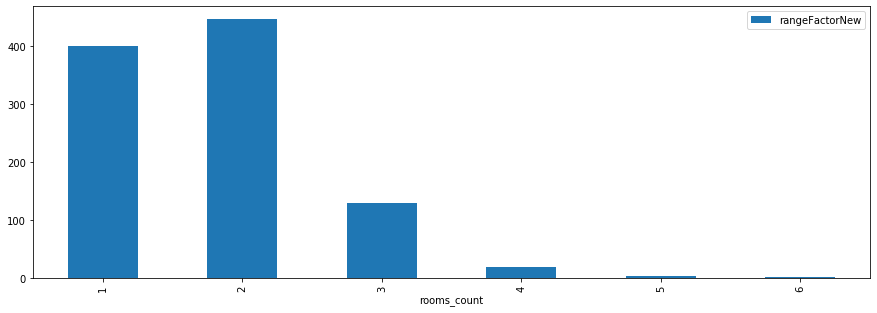

In [575]:
plot = grouped_rooms_count.plot.bar(y='rangeFactorNew', figsize=(15, 5))

In [585]:
grouped_price_usd = df[['rooms_count', 'price_usd']].groupby("rooms_count").mean()
grouped_price_usd

,price_usd
rooms_count,
1,301.934837
2,347.185682
3,474.054264
4,928.368421
5,813.333333
6,1500.000000


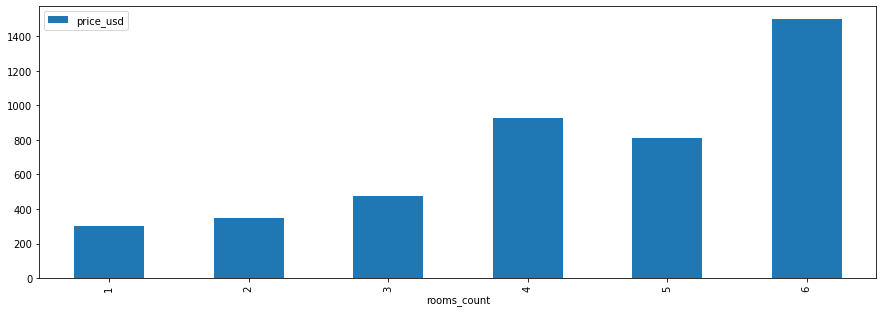

In [587]:
plot = grouped_price_usd.plot.bar(y='price_usd', figsize=(15, 5))

#### Average price per appatment size distribution
<hr>

In [588]:
grouped_price_usd = df[['rooms_count', 'price_usd']].groupby("rooms_count").mean()
grouped_price_usd['price_usd'] = round(grouped_price_usd['price_usd'], 2)

grouped_price_eur = df[['rooms_count', 'price_eur']].groupby("rooms_count").mean()
grouped_price_eur['price_eur'] = round(grouped_price_eur['price_eur'], 2)

grouped_price_uah = df[['rooms_count', 'price_uah']].groupby("rooms_count").mean()
grouped_price_uah['price_uah'] = round(grouped_price_uah['price_uah'], 2)

frames = [grouped_price_usd, grouped_price_eur, grouped_price_uah]
aggregate = pd.concat(frames, axis=1)

# rename columns after concat
aggregate.columns = ['usd', 'eur', 'uah'] 
aggregate

,usd,eur,uah
rooms_count,,,
1,301.93,268.12,8225.36
2,347.19,308.31,9458.47
3,474.05,421.04,12916.86
4,928.37,824.58,25295.05
5,813.33,722.67,22165.33
6,1500.00,1332.00,40872.00


#### Commertial VS Private distribution
<hr>

In [589]:
grouped_is_commercial = df[['is_commercial', 'rangeFactorNew']].groupby("is_commercial").count()
grouped_is_commercial

,rangeFactorNew
is_commercial,
0,79
1,920


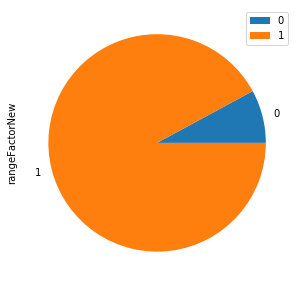

In [590]:
plot = grouped_is_commercial.plot.pie(x='is_commercial', y='rangeFactorNew', figsize=(5, 5))

#### Agency weight distribution
<hr> 

In [591]:
grouped_agency_id = df[['agency_id', 'rangeFactorNew']].groupby("agency_id").count()
grouped_agency_id.sort_values(by='rangeFactorNew', ascending=False)

,rangeFactorNew
agency_id,
27930.0,575
24288.0,148
28200.0,69
24021.0,34
29684.0,27
24804.0,20
29645.0,11
23844.0,7
23348.0,6


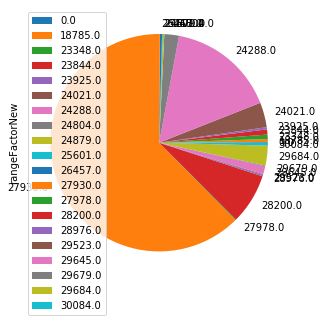

In [592]:
plot = grouped_agency_id.plot.pie(x='agency_id', y='rangeFactorNew', figsize=(5, 5))

Ok, it's clear that 2/3 of agency data belongs to single agency. Kinda monopholy

#### Visualise Min/Avg/Max square meters distribution
<hr>

In [593]:
aggregate = pd.DataFrame(columns=['rooms_count', 'total_square_meters_min', 'total_square_meters_avg', 'total_square_meters_max'])

In [594]:
temp = df[['rooms_count', 'total_square_meters']]
total_square_meters_min = temp.groupby("rooms_count").min()
total_square_meters_avg = temp.groupby("rooms_count").mean()
total_square_meters_max = temp.groupby("rooms_count").max()

total_square_meters_avg['total_square_meters'] = round(total_square_meters_avg['total_square_meters'], 1)

In [595]:
frames = [total_square_meters_min, total_square_meters_avg, total_square_meters_max]
aggregate = pd.concat(frames, axis=1)

# rename columns after concat
aggregate.columns = ['min', 'avg', 'max'] 
aggregate

,min,avg,max
rooms_count,,,
1,21.0,40.0,150.0
2,34.0,56.9,125.0
3,50.0,80.5,154.0
4,71.0,113.3,187.0
5,130.0,163.0,200.0
6,170.0,170.0,170.0


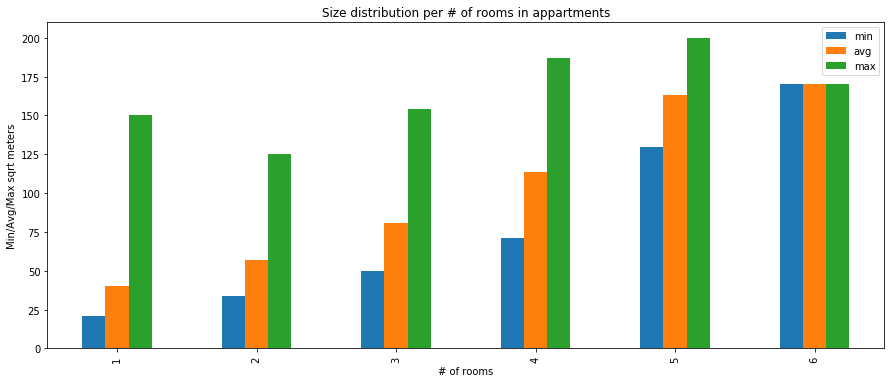

In [596]:
aggregate.plot(kind='bar', figsize=(15, 6))

plt.xlabel('# of rooms') 
plt.ylabel('Min/Avg/Max sqrt meters')
plt.title('Size distribution per # of rooms in appartments')

plt.show()

#### Visualise Min/Avg/Max prices distribution
<hr>

In [597]:
aggregate = pd.DataFrame(columns=['rooms_count', 'price_min', 'price_avg', 'price_max'])

In [598]:
temp = df[['rooms_count', 'price_usd']]
p_min = temp.groupby("rooms_count").min()
p_avg = temp.groupby("rooms_count").mean()
p_max = temp.groupby("rooms_count").max()

p_avg['price_usd'] = round(p_avg['price_usd'], 1)

In [599]:
frames = [p_min, p_avg, p_max]
aggregate = pd.concat(frames, axis=1)

# rename columns after concat
aggregate.columns = ['min', 'avg', 'max'] 
aggregate

,min,avg,max
rooms_count,,,
1,110.0,301.9,1200.0
2,110.0,347.2,1000.0
3,200.0,474.1,1500.0
4,294.0,928.4,1800.0
5,440.0,813.3,1200.0
6,1500.0,1500.0,1500.0


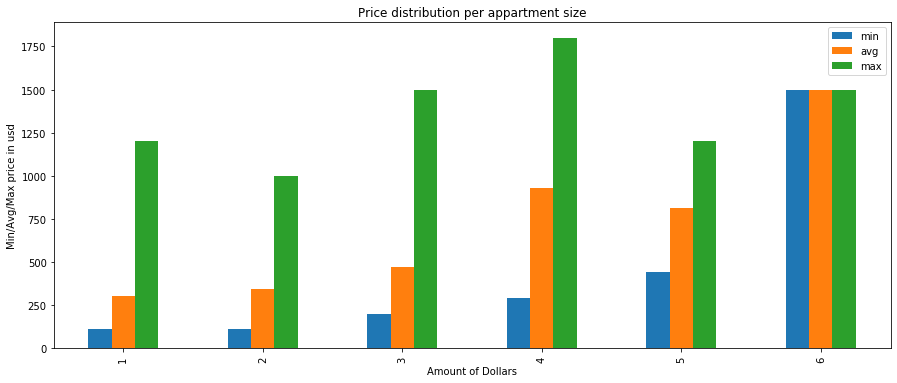

In [600]:
aggregate.plot(kind='bar', figsize=(15, 6))

plt.xlabel('Amount of Dollars') 
plt.ylabel('Min/Avg/Max price in usd')
plt.title('Price distribution per appartment size')

plt.show()

#### Maps Visualisation
<hr>

In [603]:
def get_color(n):
    if n == 1:
        return "green"
    if n == 2:
        return "blue"
    if n == 3:
        return "yellow"
    if n == 4:
        return "black"
    if n == 5:
        return "white"

In [604]:
p = df[['rangeFactorNew', 'longitude', 'latitude', 'rooms_count', 'price_uah']].query('longitude != "NaN" & latitude != "NaN"')

# create a Stamen Toner map of the world centered around Lviv, UA
lviv_map = folium.Map(location=[ 49.83, 24.05 ], zoom_start=12, tiles='Stamen Terrain')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, id, num, price in zip(p.latitude, p.longitude, p.rangeFactorNew, p.rooms_count, p.price_uah):
    folium.Marker(
        location = [lat, lng],
        popup = id, 
        tooltip = str(num) + " rooms<br>" + str(price) + " UAH",
        icon = folium.Icon(color=get_color(num))
    ).add_to(lviv_map)

# add incidents to map
lviv_map.add_child(incidents)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: color argument of Icon should be one of: {'purple', 'cadetblue', 'blue', 'darkred', 'lightgreen', 'lightred', 'white', 'gray', 'darkgreen', 'orange', 'lightgray', 'lightblue', 'beige', 'black', 'darkblue', 'pink', 'red', 'darkpurple', 'green'}.
  from ipykernel import kernelapp as app


### Uncovering insights

In [605]:
ds = df[['total_square_meters','rooms_count', 'price_usd']]
ds['roi'] = 100 * ds['total_square_meters']/ds['price_usd']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [606]:
ds.groupby('rooms_count').min()

,total_square_meters,price_usd,roi
rooms_count,,,
1,21.0,110.0,5.333333
2,34.0,110.0,6.500000
3,50.0,200.0,5.461538
4,71.0,294.0,7.400000
5,130.0,440.0,13.250000
6,170.0,1500.0,11.333333


In [607]:
ds.groupby('rooms_count').mean()

,total_square_meters,price_usd,roi
rooms_count,,,
1,39.960750,301.934837,13.730130
2,56.858389,347.185682,17.277219
3,80.511628,474.054264,19.062194
4,113.263158,928.368421,14.977352
5,163.000000,813.333333,22.598485
6,170.000000,1500.000000,11.333333


In [608]:
ds.groupby('rooms_count').max()

,total_square_meters,price_usd,roi
rooms_count,,,
1,150.0,1200.0,36.363636
2,125.0,1000.0,30.909091
3,154.0,1500.0,30.000000
4,187.0,1800.0,25.688073
5,200.0,1200.0,29.545455
6,170.0,1500.0,11.333333


### Take away

* Vast majority of data (3/4) belongs to single agency
* Vast majority of data - private sector, only a handful of records - commercial
* Four-room appartments are on the verge of statistical error
